In [68]:
 # Importing important libraries
import numpy as np
import pandas as pd

#For data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings

In [69]:
# reading Data
df=pd.read_csv('loan_prediction.csv')

In [70]:
df.head() #show first 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
#checking shape of the data
df.shape

(614, 13)

In [72]:
# checking Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [73]:
#checking null values
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


There are some missing values in data

In [74]:
df['Loan_Amount_Term'].nunique()

10

In [75]:
df['Dependents'].nunique()

4

In [76]:
df['LoanAmount'].nunique()

203

In [77]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [78]:
columns=['Loan_Amount_Term',"Dependents",'Credit_History','Gender','Married','Self_Employed']

In [79]:
# filling above columns null values with mode
for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [80]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,0


In [81]:
##Filling LoanAmount with mean values
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [82]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [83]:
# dropping unnecessary columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [84]:
df.shape

(614, 12)

In [85]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We can see there is big difference between 75% and max , means there must be outliers in data

## EDA

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

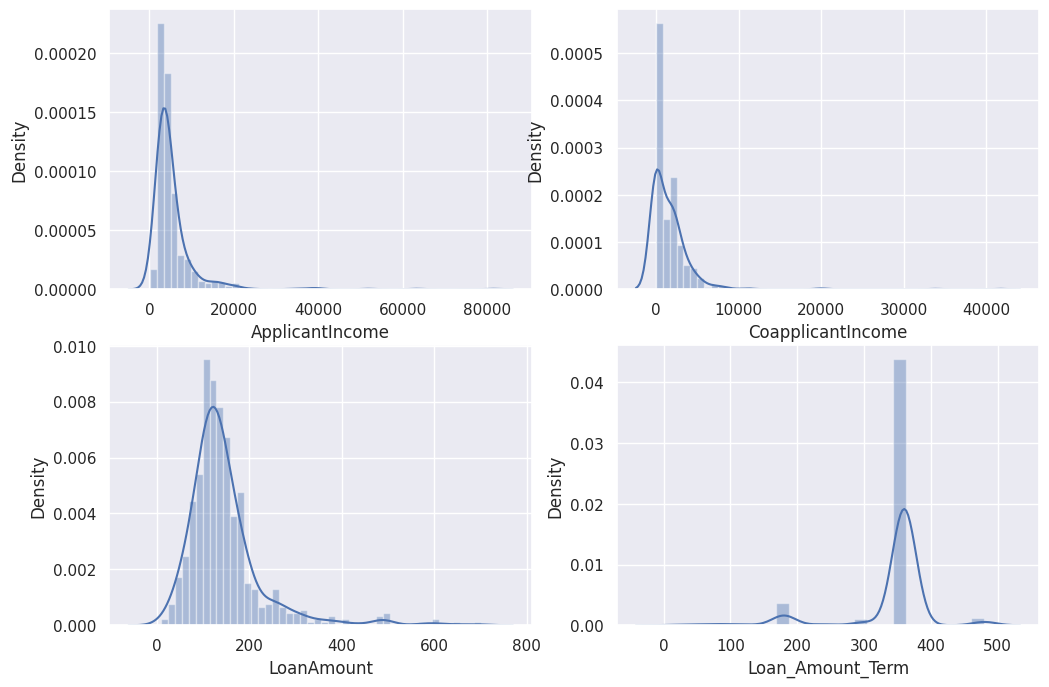

In [86]:
# Dist Plot for Continous Variables
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.distplot(df['ApplicantIncome'], ax=axs[0, 0])
sns.distplot(df['CoapplicantIncome'], ax=axs[0, 1])
sns.distplot(df['LoanAmount'], ax=axs[1, 0])
sns.distplot(df['Loan_Amount_Term'], ax=axs[1, 1])

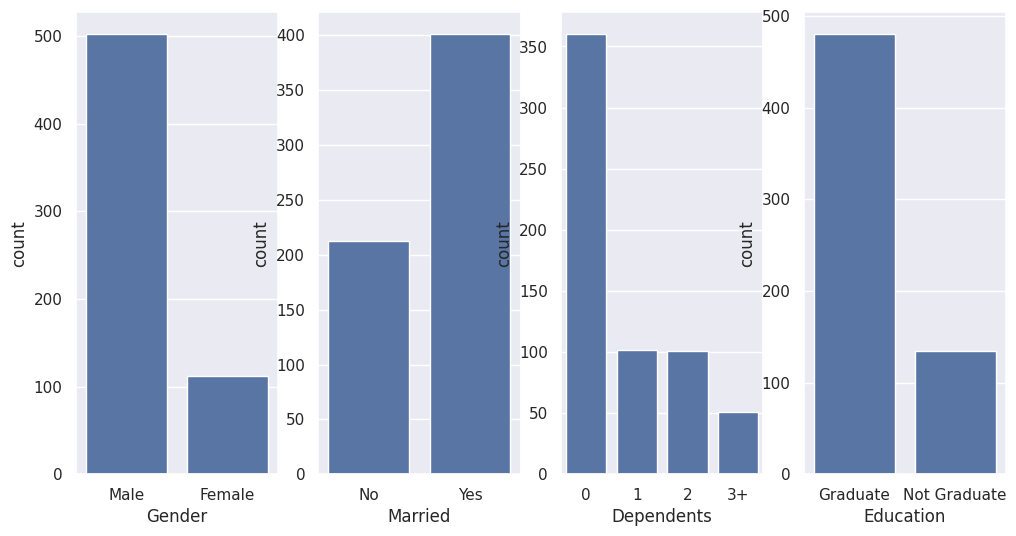

In [87]:
# Bar Plot for Categorical Variables
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
sns.countplot(x='Gender', data=df, ax=axs[0])
sns.countplot(x='Married', data=df, ax=axs[1])
sns.countplot(x='Dependents', data=df, ax=axs[2])
sns.countplot(x='Education', data=df, ax=axs[3])
plt.show()

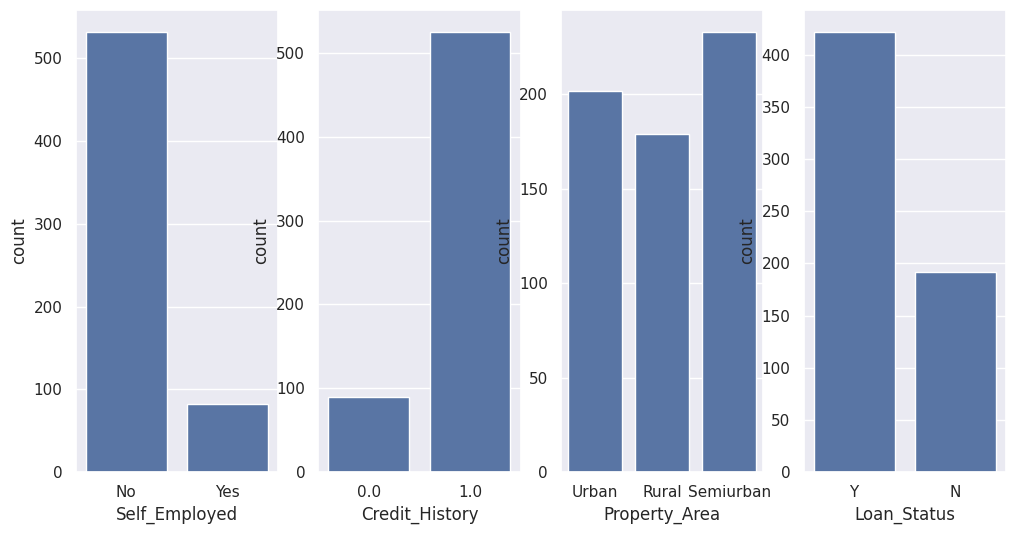

In [88]:
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
sns.countplot(x='Self_Employed', data=df, ax=axs[0])
sns.countplot(x='Credit_History', data=df, ax=axs[1])
sns.countplot(x='Property_Area', data=df, ax=axs[2])
sns.countplot(x='Loan_Status', data=df, ax=axs[3])
plt.show()

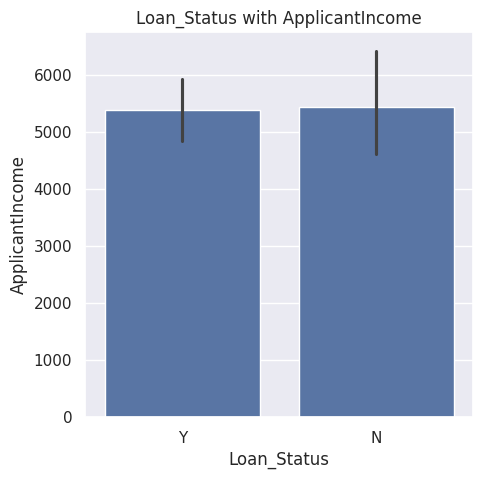

In [89]:
plt.figure(figsize=(5,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with ApplicantIncome")
plt.show()


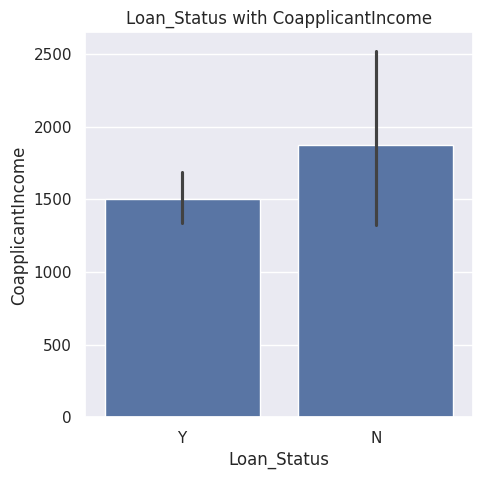

In [90]:
#Chances are equal it doesn't matter with ApplicantIncome
plt.figure(figsize=(5,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome")
plt.show()

<Axes: xlabel='Property_Area', ylabel='count'>

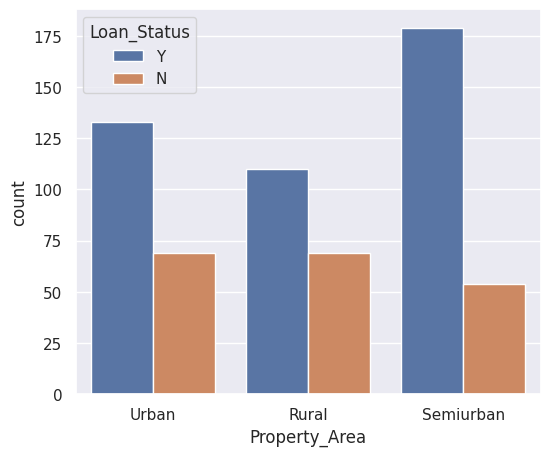

In [91]:
plt.figure(figsize=(6,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

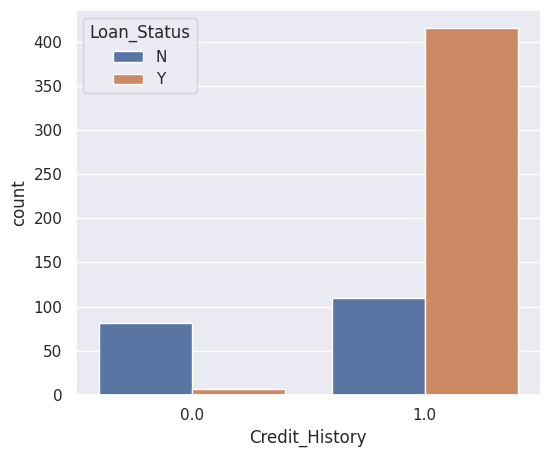

In [92]:
plt.figure(figsize=(6,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

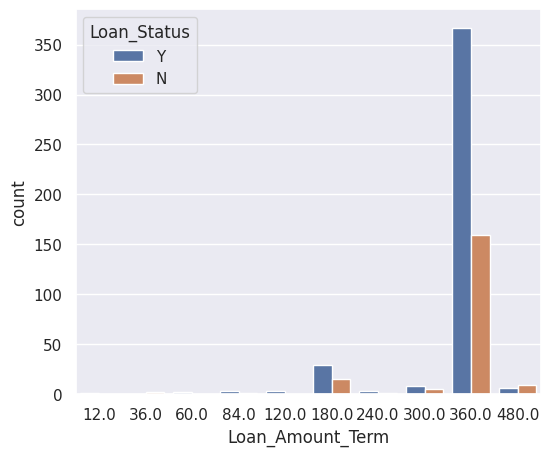

In [93]:
plt.figure(figsize=(6,5))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

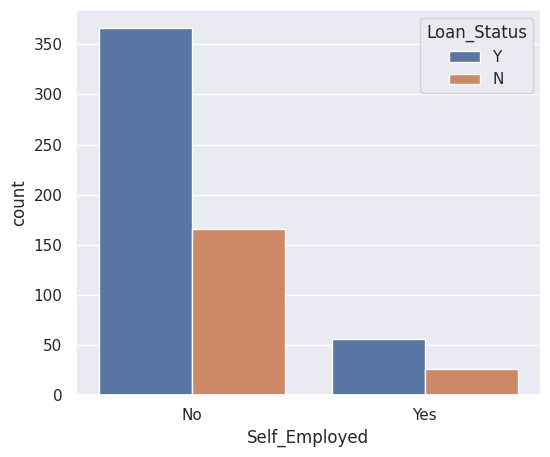

In [94]:
plt.figure(figsize=(6,5))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<Axes: xlabel='Education', ylabel='count'>

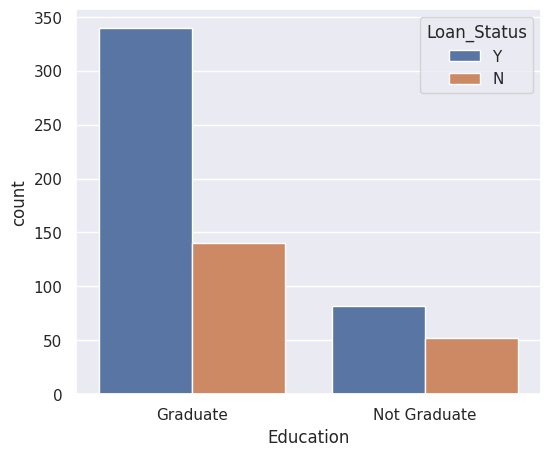

In [95]:
plt.figure(figsize=(6,5))
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

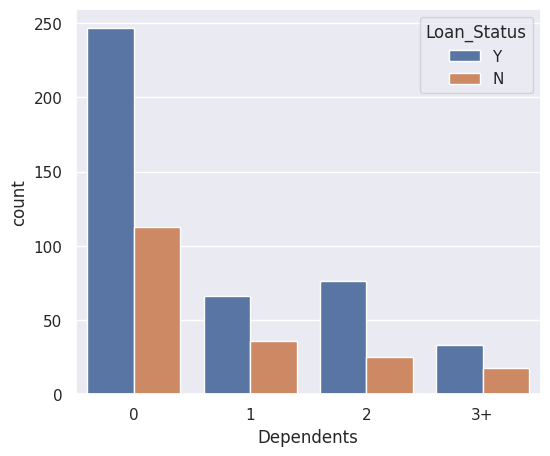

In [96]:
plt.figure(figsize=(6,5))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

## LabelEncoder for convering categorical to numerical

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int64
 1   Married            614 non-null    int64
 2   Dependents         614 non-null    int64
 3   Education          614 non-null    int64
 4   Self_Employed      614 non-null    int64
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int64
 11  Loan_Status        614 non-null    int64
dtypes: int64(12)
memory usage: 57.7 KB


All columns are converted into numerical now

In [100]:
#Skewness handling
df.skew()

,0
Gender,-1.648795
Married,-0.644850
Dependents,1.015551
Education,1.367622
Self_Employed,2.159796
ApplicantIncome,0.040993
CoapplicantIncome,0.780870
LoanAmount,0.458715
Loan_Amount_Term,-3.316702
Credit_History,-2.021971


In [101]:
from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

## Checking outliers

<Axes: ylabel='CoapplicantIncome'>

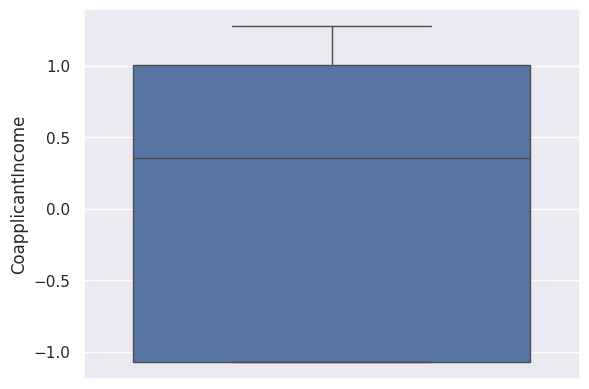

In [102]:
sns.boxplot(df['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

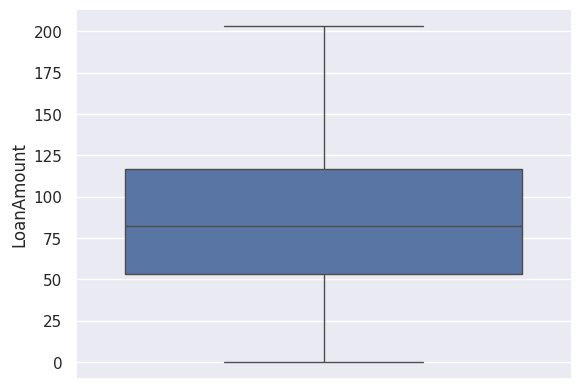

In [103]:
sns.boxplot(df['LoanAmount'])

<Axes: ylabel='Loan_Amount_Term'>

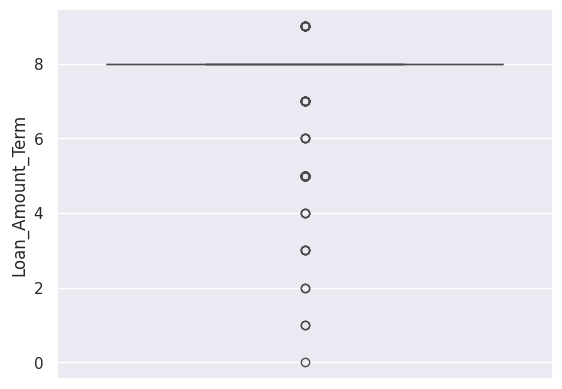

In [104]:
sns.boxplot(df['Loan_Amount_Term'])

<Axes: ylabel='Credit_History'>

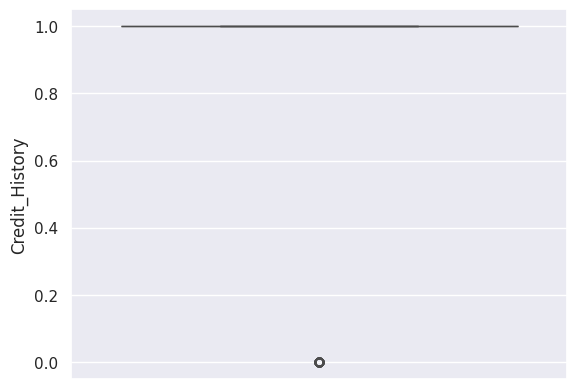

In [105]:
sns.boxplot(df['Credit_History'])

In [106]:
#Outliers removal
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585]), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]))


In [107]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (614, 12)
After removing outliers:: (602, 12)


<Axes: >

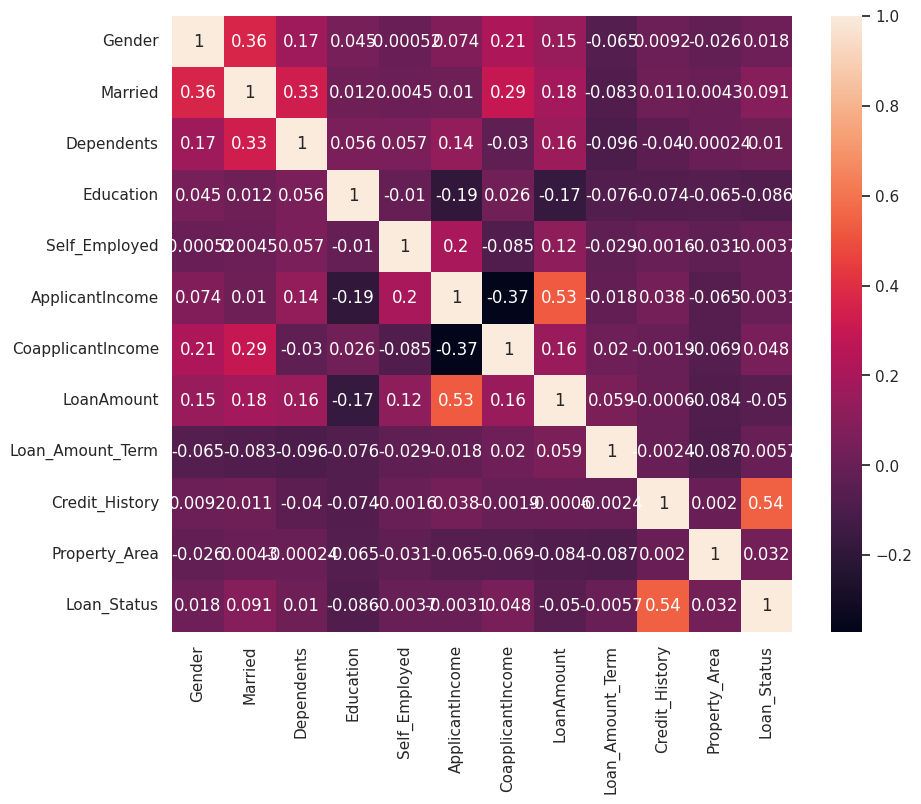

In [108]:
# draw correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [109]:
# Split the data
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [110]:
X.shape

(614, 11)

In [111]:
y.shape

(614,)

In [112]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(X)

In [113]:
pd.DataFrame(x).isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [114]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.248100,0.218241,0.133550,0.490312,0.456480,0.432118,0.851972,0.855049,0.518730
std,0.386497,0.476373,0.336541,0.413389,0.340446,0.284797,0.425818,0.224976,0.123247,0.352339,0.393741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.238591,0.000000,0.262315,0.888889,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.485119,0.608260,0.403941,0.888889,1.000000,0.500000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.733631,0.883545,0.575123,0.888889,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Loan_Status', ylabel='count'>

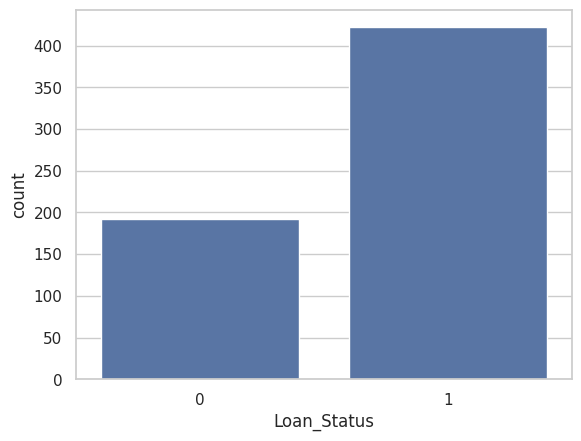

In [115]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Status", data=df)

We can see here Data is not fully balance but we'll treat the imbalace.

we have around 200 in yes and around 400 in no



In [116]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (614,)
Resample Target dataset shape (844,)


In [117]:
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Spliting Train and Test data

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [119]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((616, 11), (228, 11), (616,), (228,))

## Model Building

In [120]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')


## Logistic Regression

In [121]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=4,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.6279620853080569


In [122]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.5964912280701754
[[53 70]
 [22 83]]
              precision    recall  f1-score   support

           0       0.71      0.43      0.54       123
           1       0.54      0.79      0.64       105

    accuracy                           0.60       228
   macro avg       0.62      0.61      0.59       228
weighted avg       0.63      0.60      0.59       228

Training accuracy:: 0.6737012987012987
Test accuracy:: 0.5964912280701754


## Decision Tree Classifier

In [123]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(dtc_score))

cross validation score: 0.7441391941391942


In [124]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.75
[[92 31]
 [26 79]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       123
           1       0.72      0.75      0.73       105

    accuracy                           0.75       228
   macro avg       0.75      0.75      0.75       228
weighted avg       0.75      0.75      0.75       228

Training accuracy:: 1.0
Test accuracy:: 0.75


## K Nearest Neighbour Classifier

In [125]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.732185122569738


In [126]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6403508771929824
[[78 45]
 [37 68]]
              precision    recall  f1-score   support

           0       0.68      0.63      0.66       123
           1       0.60      0.65      0.62       105

    accuracy                           0.64       228
   macro avg       0.64      0.64      0.64       228
weighted avg       0.64      0.64      0.64       228

Training accuracy:: 0.836038961038961
Test accuracy:: 0.6403508771929824


## Random Forest Classifier

In [127]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8258805297266836


In [128]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.7894736842105263
[[93 30]
 [18 87]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.79       123
           1       0.74      0.83      0.78       105

    accuracy                           0.79       228
   macro avg       0.79      0.79      0.79       228
weighted avg       0.79      0.79      0.79       228

Training accuracy:: 1.0
Test accuracy:: 0.7894736842105263


## Lets perform Hyperparameter Tuning on the best model, which is Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# GridSearchCV to tune hyperparameters (set verbose=0 to suppress detailed output)
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

# Fit GridSearchCV
grid_search_rf.fit(x_train, y_train)

# Print the best parameters and the best score
print(f'Best Parameters: {grid_search_rf.best_params_}')
print(f'Best Cross-Validation Accuracy: {grid_search_rf.best_score_:.4f}')

# Evaluate the best model on the test set
best_rf_model = grid_search_rf.best_estimator_
test_accuracy = accuracy_score(y_test, best_rf_model.predict(x_test))
print(f'Test Accuracy of the Best Random Forest Model: {test_accuracy:.4f}')

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.8280
Test Accuracy of the Best Random Forest Model: 0.7763


## Plot ROC Curve

In [130]:
from sklearn.metrics import roc_auc_score

In [131]:
print("roc auc score::",roc_auc_score(y_test,best_rf_model.predict(x_test) ))

roc auc score:: 0.7801393728222997


In [132]:
from sklearn.metrics import roc_curve

In [133]:
fpr1, tpr1, thresh1 = roc_curve(y_test,best_rf_model.predict(x_test) , pos_label=1)

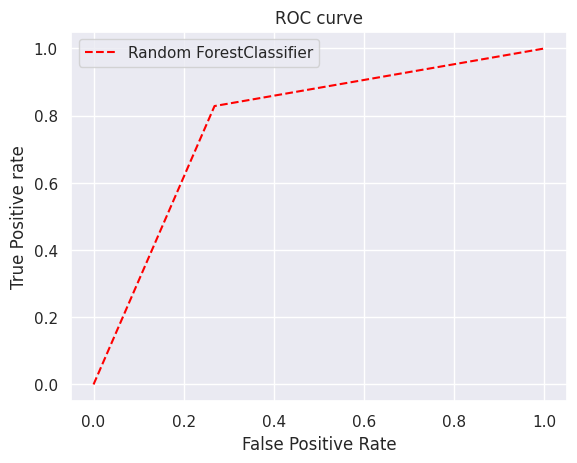

In [134]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Random ForestClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Saving Model:

In [136]:
import pickle
#Save the model using pickle
model =  RandomForestClassifier
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)